# 1. Sklearn SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 1.1 Make data

In [2]:
X, y = make_classification(n_samples = 200,
                           n_features = 2,
                           n_redundant = 0,
                           n_informative = 2,
                           n_clusters_per_class = 1,
                           random_state = 42)

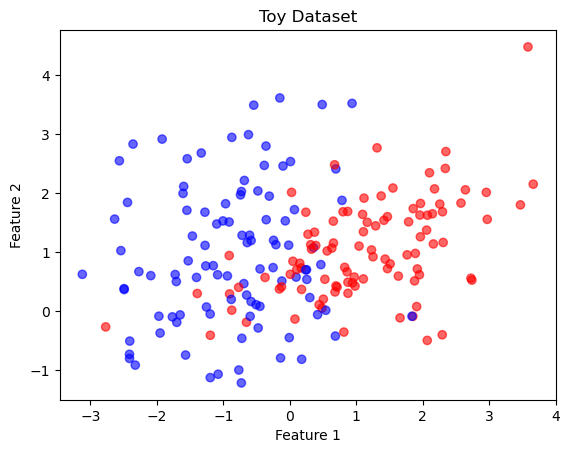

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Toy Dataset")
plt.show()

## 1.2 Fit SVC

In [4]:
model = SVC(kernel="linear", C=1.0) # C bigger: prone to overfit, C smllaer to underfit
model.fit(X, y)

SVC(kernel='linear')

## 1.3 Prediction

In [5]:
y_pred = model.predict(X)

## 1.4 Evaluation

In [6]:
acc = accuracy_score(y, y_pred)
print(f"Accuracy score: {acc}")

Accuracy score: 0.84


## 1.5 visualize the decision boundary

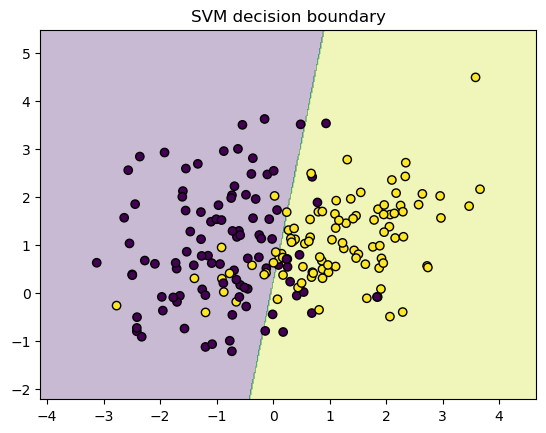

In [10]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors="k")
    plt.title("SVM decision boundary")
    plt.show()

plot_decision_boundary(model, X, y)

# 2. Numpy SVM

## 2.1 Turn the label from (0, 1) to (-1, 1)

In [16]:
y_svm = y.copy()
y_svm[y_svm == 0] = -1



## 2.2 init the paramters

In [17]:
w = np.zeros(X.shape[1])
b = 0
lr = 0.01
epochs = 1000
C = 1.0

## 2.3 Train

In [18]:
for epoch in range(epochs):
    for i in range(len(X)): #SGD update every sample
        xi = X[i]
        yi = y_svm[i]

        condition = yi * (np.dot(w, xi) + b) >= 1

        if condition:
            dw = w
            db = 0

        else:
            dw = w - C * yi * xi
            db = -C * yi

        w = w - lr * dw
        b = b - lr * db
        

## 2.4 prediction

In [19]:
y_pred_custom = np.sign(X @ w + b)
y_pred_custom[y_pred_custom == -1] = 0

## 2.5 evaluation

In [20]:
acc_custom = accuracy_score(y, y_pred_custom)
print(f"NumPy 实现 SVM Accuracy: {acc_custom:.2f}")

NumPy 实现 SVM Accuracy: 0.84


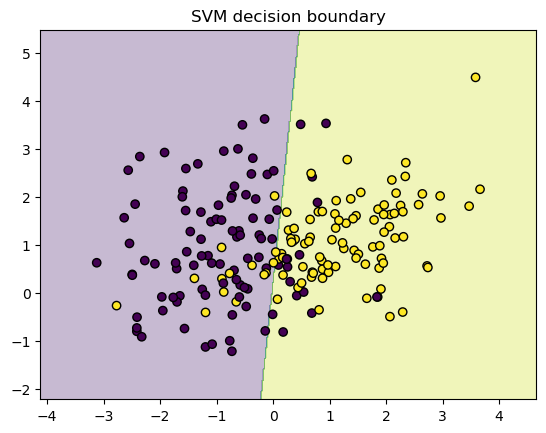

In [22]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.sign(np.c_[xx.ravel(), yy.ravel()] @ w + b)
Z[Z == -1] = 0
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors="k")
plt.title("SVM decision boundary")
plt.show()

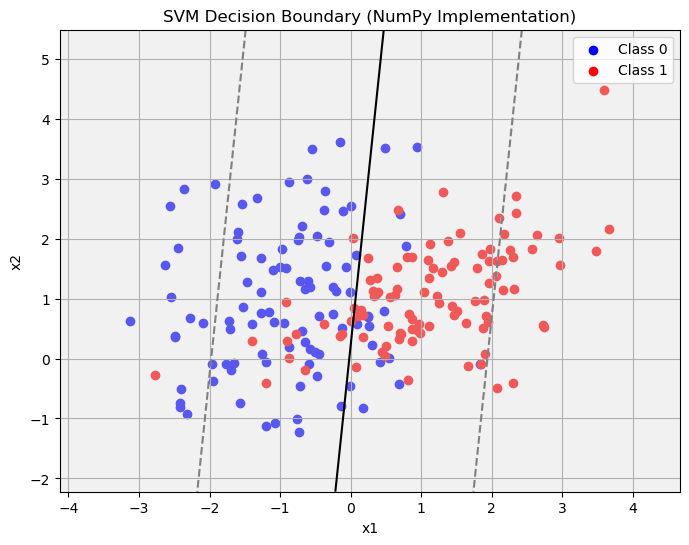

In [24]:
def plot_svm_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))

    # 1. 绘制散点图
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')

    # 2. 创建 mesh 网格用于画决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # 3. 计算超平面函数值
    Z = w[0] * xx + w[1] * yy + b
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['gray', 'black', 'gray'],
                linestyles=['--', '-', '--'])

    # 4. 增加 margin 阴影区域
    plt.contourf(xx, yy, (Z >= -1) & (Z <= 1), levels=1, colors=['#ddd'], alpha=0.4)

    # 5. 设置图例等
    plt.legend()
    plt.title("SVM Decision Boundary (NumPy Implementation)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

plot_svm_decision_boundary(X, y, w, b)